# Linear Regression

This notebook implements linear regression, a supervised learning technique for predicting numerical values given a set of features.

---

First, load the relevant libraries needed.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Import a nice function for plotting decision boundaries
from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

### The Data

A linear regression model will be trained using the [Hawks](https://r-data.pmagunia.com/dataset/r-dataset-package-stat2data-hawks) dataset. This dataset contains observations for three species of hawks, and attributes such as age, sex, wing length, body weight, tail length, etc. 

The code block below reads the dataset into a pandas DataFrame object, subsets the DataFrame to the relevant variables, and drops any rows where there are missing values for these relevant variables.

In [2]:
# Read in the data and subset it to the relevant columns/observations
df = pd.read_csv("../../Data/hawks.csv")
df = df[["Species", "Wing", "Tail"]].dropna(axis=0)
df

,Species,Wing,Tail
0,RT,385.0,219
1,RT,376.0,221
2,RT,381.0,235
3,CH,265.0,220
4,SS,205.0,157
...,...,...,...
903,RT,380.0,224
904,SS,190.0,150
905,RT,360.0,211
906,RT,369.0,207


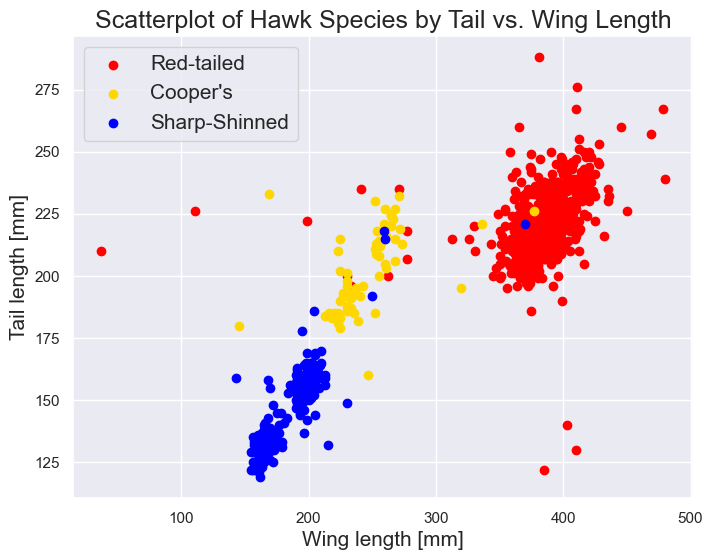

In [3]:
# Produce a scatterplot of tail vs. wing length, color-coded by hawk species
RT = df[df.Species == "RT"]
CH = df[df.Species == "CH"]
SS = df[df.Species == "SS"]

plt.figure(figsize = (8, 6))
plt.scatter(RT.Wing, RT.Tail, color = "red", label = "Red-tailed")
plt.scatter(CH.Wing, CH.Tail, color = "gold", label = "Cooper's")
plt.scatter(SS.Wing, SS.Tail, color = "blue", label = "Sharp-Shinned")
plt.title("Scatterplot of Hawk Species by Tail vs. Wing Length", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")
plt.show()

As one sees from the scatterplot above, there appears to be a linear relationship between wing length and tail length. As the wing length increases by 1 mm, there appears to be a linear increase in tail length. Thus, a potential linear regression model would be to predict a hawk's tail length from their wing length.

A linear model predicting tail length from wing length is viable!

### Training the model

To implement linear regression, I create this custom class with all the necessary functionalities outlined by the algorithm, found in the `README.md` file of this `linear_regression` directory.

In [4]:
class LinearRegression:
    """
    A class to fit a linear regression model to data and obtain model diagnostics.

    ...

    Attributes
    ----------
    weights : numpy array (of floats)
        Parameters of the trained models, organized as [w_bias, w_1, w_2, ..., w_n]
    train_errors: list of floats
        Each entry in this list is an error calculated during training iterations
    """
    
    def __init__(self):
        self.weights = None
        self.train_errors = []
    
    def train(self, X, y, rate=0.05, iterations=1000):
        """
        Train a linear regression model

        Parameters
        ----------
        X: matrix of feature values
        y: array of observed values
        rate (float): learning rate
        iterations (int): number of iterations to train the model for

        Returns: None
        """
        n_obs, n_features = X.shape

        # Initialize coefficients/weights and intercept/bias from a uniform distribution
        self.weights = np.random.rand(n_features + 1)
        
        # Implement stochastic gradient decent
        for _ in range(iterations):
            total_error = 0
            for i in range(0, n_obs):
                err = self.predict(X[i,]) - y[i]
                self.weights -= rate * err * np.insert(X[i,], 0, 1)
                #print(i, err)
                total_error += 0.5 * err**2
            self.train_errors.append(total_error / n_obs)
            
    def predict(self, X):
        """
        Obtain the predicted values given a matrix of features
        """
        X = np.insert(X, 0, 1)
        return np.dot(X, self.weights)

First, I test this class on some sample simulated data.

In [5]:
X = np.array([[1,2], [3,4], [5,6]])
y = np.array([7, 8, 9])

lin_model = LinearRegression()
lin_model.train(X, y, 0.01, 1000)

print(lin_model.weights) # prints the model parameters

[ 4.43418382 -1.56432862  2.06460513]


Now, I train a linear regression model for the Hawk data to predict tail length from wing length.

The learning rate of `0.00001` was determined using trial and error. I started off with a learning rate of 0.01, but found that there would be overflow errors. The error calculated at each step of stochastic gradient descent would be too large, causing the weights to fail to converge. I added zeroes to the initial learning rate and increased the number of epochs/iterations until the current learning rate of `0.00001` and `5000` iterations produced satisfactory results.

In [6]:
tail_model = LinearRegression()
tail_model.train(np.array(df[["Wing"]]), np.array(df.Tail), 0.00001, 5000)

print(tail_model.weights) # prints the model parameters

[84.00054498  0.47234802]


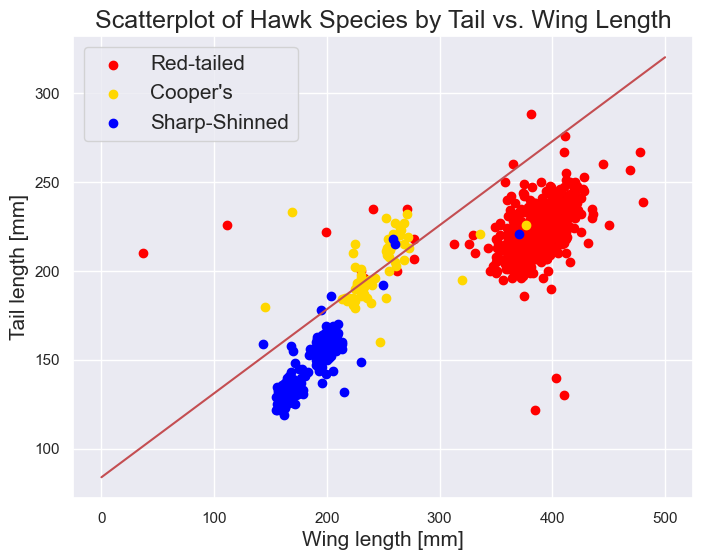

In [7]:
# Produce a scatterplot of tail vs. wing length, color-coded by hawk species
RT = df[df.Species == "RT"]
CH = df[df.Species == "CH"]
SS = df[df.Species == "SS"]

plt.figure(figsize = (8, 6))
plt.scatter(RT.Wing, RT.Tail, color = "red", label = "Red-tailed")
plt.scatter(CH.Wing, CH.Tail, color = "gold", label = "Cooper's")
plt.scatter(SS.Wing, SS.Tail, color = "blue", label = "Sharp-Shinned")
plt.title("Scatterplot of Hawk Species by Tail vs. Wing Length", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")

x = np.linspace(0,500,100)
y = tail_model.weights[0] + tail_model.weights[1]*x
plt.plot(x, y, '-r', label='y=2x+1')

plt.show()

### Linear Regression by Species

For fun, I run the linear regression algorithm for each of the three hawk species. I'm curious whether there will be any different results in terms of slope.

In [8]:
tail_model_RT = LinearRegression()
tail_model_RT.train(np.array(RT.Wing).reshape(-1, 1), np.array(RT.Tail), 0.00001, 5000)

tail_model_CH = LinearRegression()
tail_model_CH.train(np.array(CH.Wing).reshape(-1, 1), np.array(CH.Tail), 0.00001, 5000)

tail_model_SS = LinearRegression()
tail_model_SS.train(np.array(SS.Wing).reshape(-1, 1), np.array(SS.Tail), 0.00001, 5000)

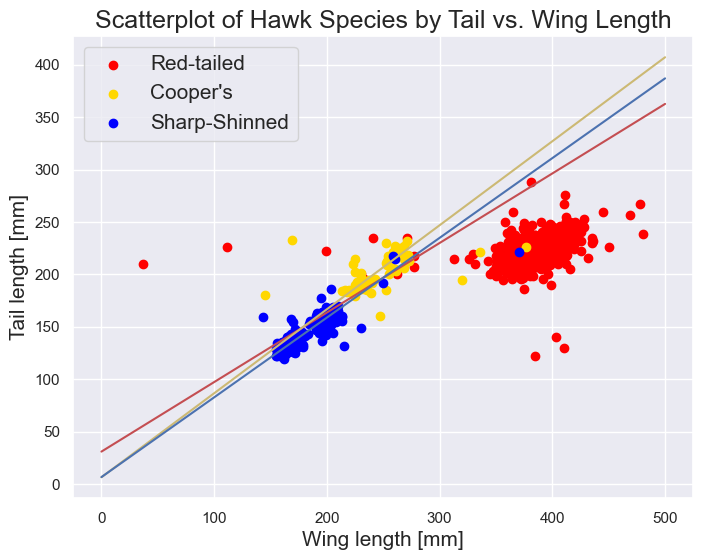

In [9]:
plt.figure(figsize = (8, 6))
plt.scatter(RT.Wing, RT.Tail, color = "red", label = "Red-tailed")
plt.scatter(CH.Wing, CH.Tail, color = "gold", label = "Cooper's")
plt.scatter(SS.Wing, SS.Tail, color = "blue", label = "Sharp-Shinned")
plt.title("Scatterplot of Hawk Species by Tail vs. Wing Length", fontsize = 18)
plt.xlabel("Wing length [mm]", fontsize = 15)
plt.ylabel("Tail length [mm]", fontsize = 15)
plt.legend(fontsize = 15, loc = "upper left")

x = np.linspace(0,500,100)
#y = tail_model.weights[0] + tail_model.weights[1]*x
plt.plot(x, tail_model_RT.weights[0] + tail_model_RT.weights[1]*x, '-r', label='y=2x+1')
plt.plot(x, tail_model_CH.weights[0] + tail_model_CH.weights[1]*x, '-y', label='y=2x+1')
plt.plot(x, tail_model_SS.weights[0] + tail_model_SS.weights[1]*x, '-b', label='y=2x+1')
plt.show()

The lines actually all look fairly similar on the plot above! An increase in wing length results in a linear increase in tail length regardless of hawk species.

### Using scikit-learn

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(df["Wing"].values.reshape(-1, 1), df["Tail"].values.reshape(-1, 1))
lin_reg.intercept_, lin_reg.coef_

(array([88.97193236]), array([[0.34805905]]))

The coefficients produced from scikit-learn are comparable to those weights outputted from the trained model!